In [1]:
from drl import DEMSimulator
from drl.utils import load_config
from drl import RainfallSimulator
from drl import DiffusiveWaveRouter
from drl.utils import save_h, save_h_quads, make_routing_gif, make_quad_rainfall_gif, make_quad_routing_gif
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

In [2]:
# Example usage
dem_simulator = DEMSimulator("../config/config_dem1.yaml")
dem_simulator.generate_all_dems()
dems = dem_simulator.get_dems()

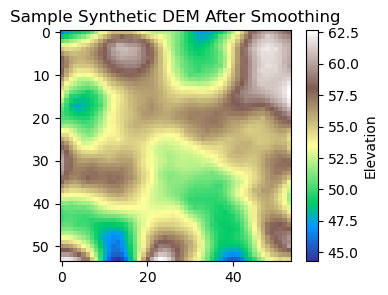

In [3]:
# Visualize one of the DEMs
for i in range(len(dems)):
    plt.figure(figsize=(4, 3))
    plt.imshow(dems[i], cmap='terrain')
    plt.colorbar(label='Elevation')
    plt.title('Sample Synthetic DEM After Smoothing')
    plt.show()

In [4]:
rain_simulator = RainfallSimulator("../config/config_dem1.yaml")
rain = rain_simulator.generate(dems[0])  

In [5]:
len(rain)

4

In [6]:
make_quad_rainfall_gif(rain, dems[0])

/Users/jmframe/deep_routing_lab/src/drl/utils/viz.py:176: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


✅ Quadrant rainfall GIF saved to outputs/rain/rainfall_quadrants.gif


In [13]:
router = DiffusiveWaveRouter(dem=dems[0], dx=1.0, dt=0.1, manning_n=1)
h_dict = {}
for i in ["north", "south", "east", "west"]:
    router.reset()
    h_dict[i] = router.run(rain[i])

Routing: 100%|██████████| 60/60 [00:00<00:00, 7541.45it/s]


In [14]:
save_h(h_dict[i], dem=dems[0], cmap="Blues", alpha=.8)
make_routing_gif(gif_name='routing.gif', fps=15)

✅ GIF saved to outputs/routing/routing.gif


In [15]:
save_h_quads(h_dict, dem=dems[0], out_dir='outputs/routing', vmin=0, vmax=None, alpha=0.6, n_contours=20)
make_quad_routing_gif(out_dir='outputs/routing', gif_name='routing_quads.gif', fps=25, cleanup=True)

✅ Quadrant routing images saved to outputs/routing
✅ Quadrant routing GIF saved to outputs/routing/routing_quads.gif
